## Import Library

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Membaca Gambar

In [4]:
img = cv2.imread('NAMA.jpeg')

In [5]:
img.shape

(2280, 4056, 3)

In [6]:
[baris, kolom] = img.shape[:2]

## Convert BGR to RGB

In [7]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Jawaban No 1

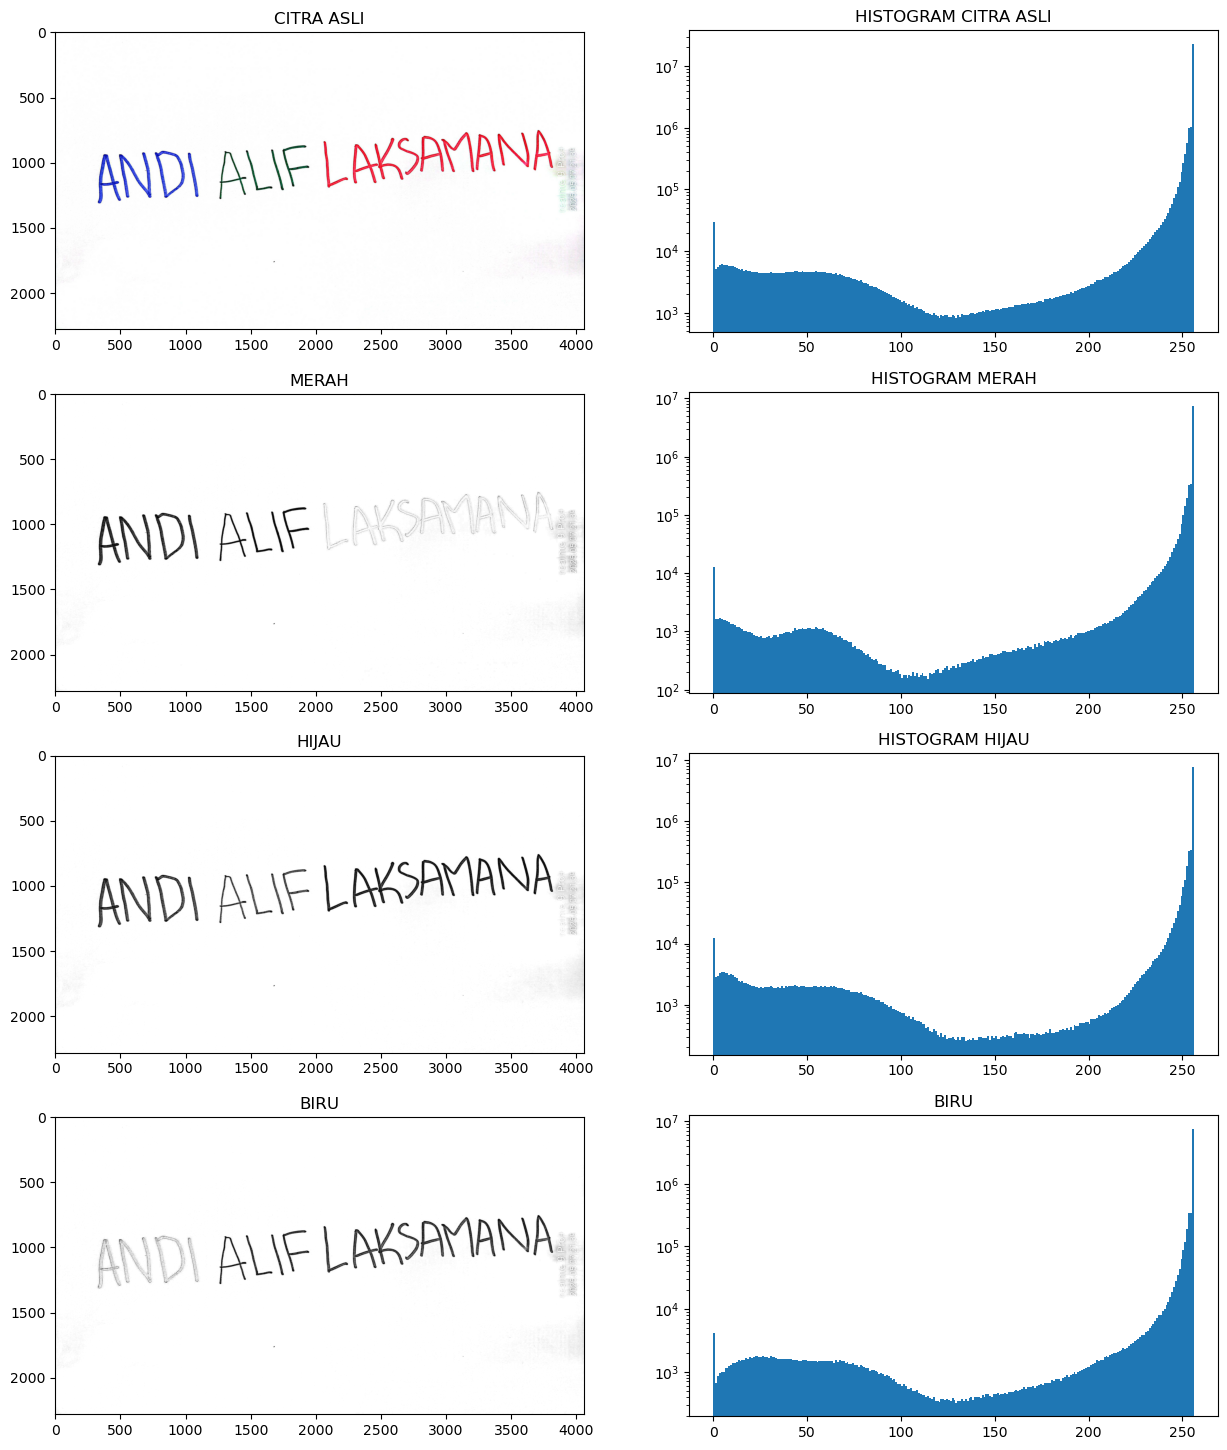

In [8]:
image_path = "NAMA.jpeg"  
img = Image.open(image_path).convert("RGB")
rgb = np.array(img)

red_channel = rgb[:, :, 0]   
green_channel = rgb[:, :, 1]  
blue_channel = rgb[:, :, 2]   

fig, axs = plt.subplots(4, 2, figsize=(15, 18))

axs[0, 0].imshow(rgb)
axs[0, 0].set_title("CITRA ASLI")

# Histogram Citra Asli (Gabungan RGB)
axs[0, 1].hist(rgb.ravel(),256,[0,256])
axs[0, 1].set_title("HISTOGRAM CITRA ASLI")
axs[0, 1].set_yscale('log')

# Channel Merah 
axs[1, 0].imshow(red_channel, cmap='gray')
axs[1, 0].set_title("MERAH")

# Histogram Channel Merah
axs[1, 1].hist(red_channel.ravel(),256,[0,256])
axs[1, 1].set_title("HISTOGRAM MERAH")
axs[1, 1].set_yscale('log')

# Channel Hijau 
axs[2, 0].imshow(green_channel, cmap='gray')
axs[2, 0].set_title("HIJAU")

# Histogram Channel Hijau
axs[2, 1].hist(green_channel.ravel(),256,[0,256])
axs[2, 1].set_title("HISTOGRAM HIJAU")
axs[2, 1].set_yscale('log')

# Channel Biru 
axs[3, 0].imshow(blue_channel, cmap='gray')
axs[3, 0].set_title("BIRU")

# Histogram Channel Biru
axs[3, 1].hist(blue_channel.ravel(),256,[0,256])
axs[3, 1].set_title("HISTOGRAM BIRU")
axs[3, 1].set_yscale('log')


plt.show()

## Jawaban No 2

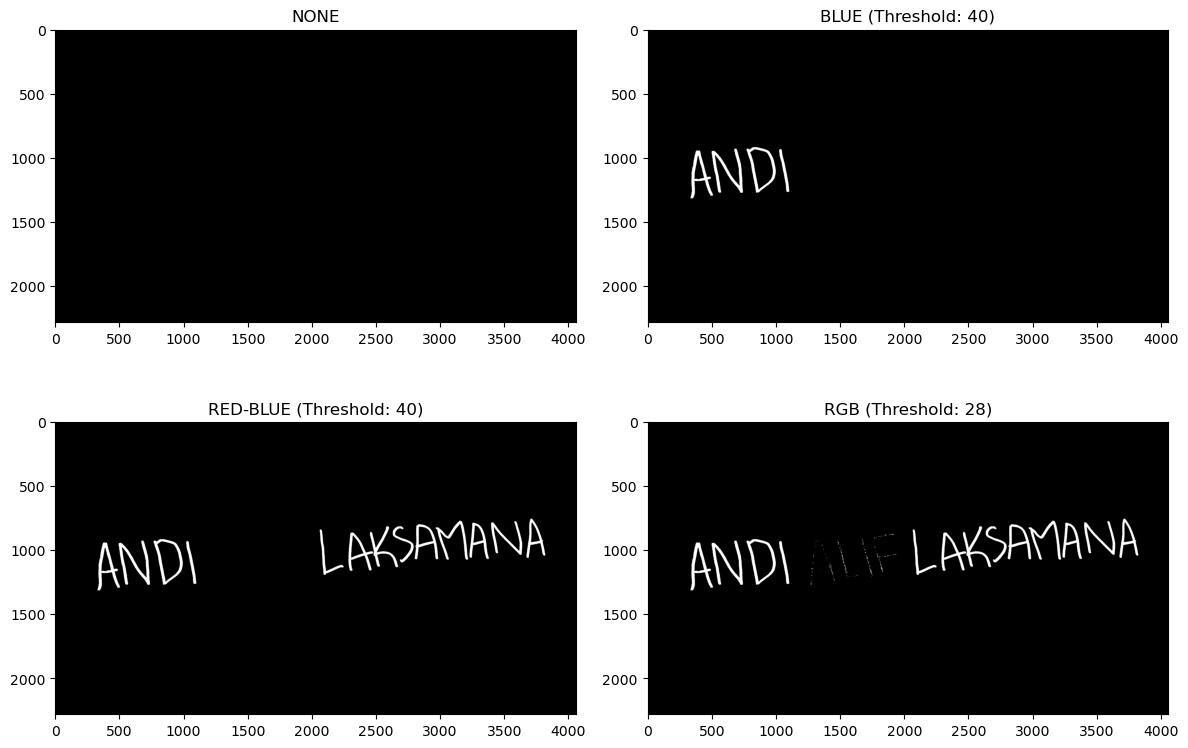

In [148]:
def hitung_statistik_rgb(gambar_rgb):
    r, g, b = gambar_rgb[:, :, 0], gambar_rgb[:, :, 1], gambar_rgb[:, :, 2]
    mean = np.mean([r, g, b], axis=(1, 2))
    std = np.std([r, g, b], axis=(1, 2))
    return mean, std
    
def threshold_otomatis(mean, std):
    return {
        'biru': int(abs(mean[2] - (mean[0] + mean[1]) / 2) + 1.5 * std[2]),
        'merah_biru': int(0.8 * (std[0] + std[2])),
        'rgb': int((max(std) + min(std)) * 0.5)
    }

def ambil_mask_hsv(hsv_img, warna):
    if warna == 'merah':
        lower1, upper1 = [0, 100, 100], [10, 255, 255]
        lower2, upper2 = [160, 100, 100], [180, 255, 255]
        mask1 = cv2.inRange(hsv_img, np.array(lower1), np.array(upper1))
        mask2 = cv2.inRange(hsv_img, np.array(lower2), np.array(upper2))
        return cv2.bitwise_or(mask1, mask2)
    elif warna == 'biru':
        return cv2.inRange(hsv_img, np.array([100, 100, 100]), np.array([140, 255, 255]))
    elif warna == 'hijau':
        return cv2.inRange(hsv_img, np.array([40, 100, 100]), np.array([80, 255, 255]))
    else:
        return np.zeros(hsv_img.shape[:2], dtype=np.uint8)

def tampilkan_mask(mask, gambar_asli, judul, ax):
    hasil = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask)
    abu = cv2.cvtColor(hasil, cv2.COLOR_RGB2GRAY)
    _, biner = cv2.threshold(abu, 1, 255, cv2.THRESH_BINARY)
    ax.imshow(biner, cmap='gray')
    ax.set_title(judul)
    
gambar = cv2.imread('NAMA.jpeg')
gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)
gambar_hsv = cv2.cvtColor(gambar, cv2.COLOR_BGR2HSV)

# 2. Hitung statistik
mean_rgb, std_rgb = hitung_statistik_rgb(gambar_rgb)
ambang = threshold_otomatis(mean_rgb, std_rgb)

# 3. Buat masker
mask_none = np.zeros(gambar_rgb.shape[:2], dtype=np.uint8)
mask_biru = ambil_mask_hsv(gambar_hsv, 'biru')
mask_merah = ambil_mask_hsv(gambar_hsv, 'merah')
mask_hijau = ambil_mask_hsv(gambar_hsv, 'hijau')

mask_red_blue = cv2.bitwise_or(mask_biru, mask_merah)
mask_rgb = cv2.bitwise_or(mask_red_blue, mask_hijau)

# 4. Tampilkan hasil
judul_list = ['NONE', f"BLUE (Threshold: {ambang['biru']})", f"RED-BLUE (Threshold: {ambang['merah_biru']})", f"RGB (Threshold: {ambang['rgb']})"]
mask_list = [mask_none, mask_biru, mask_red_blue, mask_rgb]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for ax, mask, judul in zip(axs.flat, mask_list, judul_list):
    tampilkan_mask(mask, gambar_rgb, judul, ax)

plt.tight_layout()
plt.show()

## Jawaban no 3


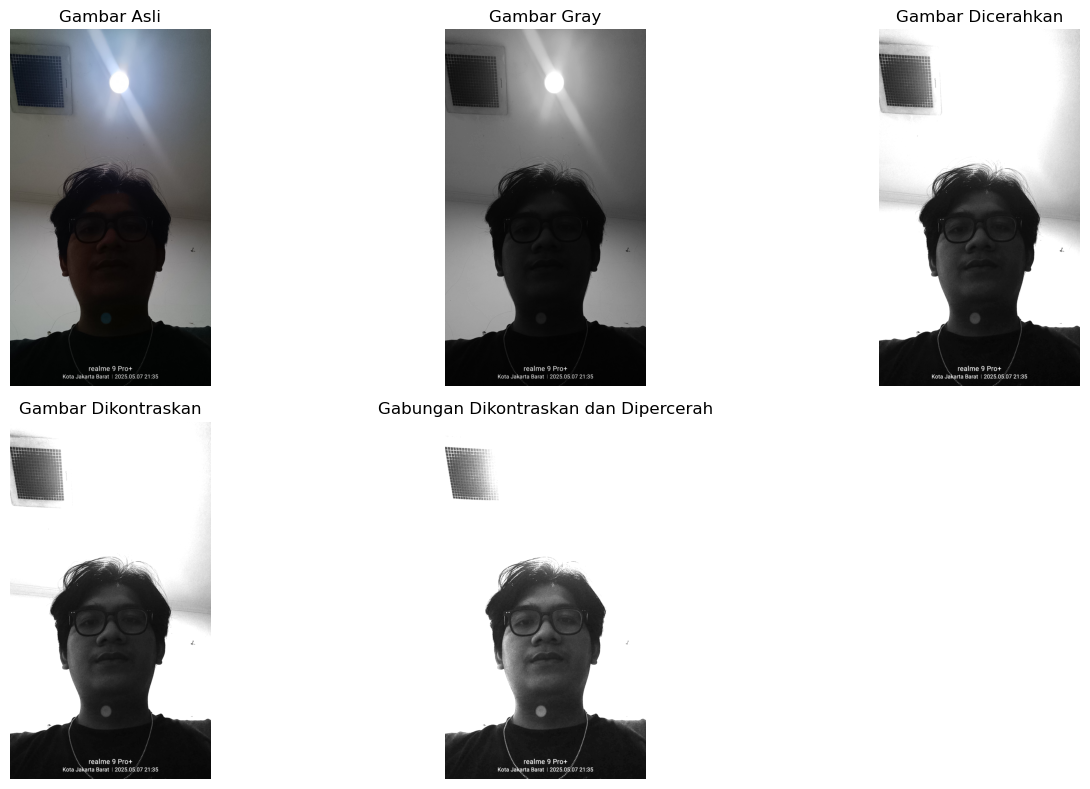

In [149]:
img = cv2.imread('HITAM.jpeg')
img.shape
[baris, kolom] = img.shape[:2]

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

bright = cv2.convertScaleAbs(gray, alpha=1.5, beta=100)
contrast = cv2.convertScaleAbs(gray, alpha=2.0, beta=75)
bright_contrast = cv2.convertScaleAbs(gray, alpha=2.0, beta=150)

titles = ['Gambar Asli', 'Gambar Gray', 'Gambar Dicerahkan', 'Gambar Dikontraskan', 'Gabungan Dikontraskan dan Dipercerah']
images = [rgb, gray, bright, contrast, bright_contrast]

plt.figure(figsize=(14, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    if i == 0:
        plt.imshow(images[i])
    else:
        plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
